## Support Vector Regression model to predict the power consumption of a household

### Data Attributes

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### Data Injestion

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [235]:
# picking 50000 records from the total records of the dataset
df=pd.read_csv("household_power_consumption/household_power_consumption.txt",delimiter=";").sample(50000).reset_index()

## EDA & Preprocessing

In [236]:
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1161765,2/3/2009,12:09:00,0.496,0.054,243.720,2.600,0.000,0.000,0.0
1,478869,14/11/2007,06:33:00,0.312,0.080,244.560,1.200,0.000,0.000,0.0
2,1289885,30/5/2009,11:29:00,0.584,0.198,239.970,2.600,0.000,0.000,1.0
3,1977413,19/9/2010,22:17:00,0.826,0.000,245.040,3.400,0.000,0.000,1.0
4,225824,22/5/2007,13:08:00,0.318,0.076,237.040,1.400,0.000,0.000,0.0


In [237]:
# Removing the index column
df.drop('index', axis=True, inplace=True)

In [238]:
# Top 5 records from the dataset
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2/3/2009,12:09:00,0.496,0.054,243.720,2.600,0.000,0.000,0.0
1,14/11/2007,06:33:00,0.312,0.080,244.560,1.200,0.000,0.000,0.0
2,30/5/2009,11:29:00,0.584,0.198,239.970,2.600,0.000,0.000,1.0
3,19/9/2010,22:17:00,0.826,0.000,245.040,3.400,0.000,0.000,1.0
4,22/5/2007,13:08:00,0.318,0.076,237.040,1.400,0.000,0.000,0.0


In [239]:
# Bottom 5 records from the dataset
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49995,5/6/2010,07:54:00,1.554,0.216,241.520,6.600,0.000,2.000,19.0
49996,13/11/2009,18:24:00,0.960,0.000,241.320,4.000,0.000,0.000,1.0
49997,1/9/2010,04:24:00,0.350,0.234,243.610,1.600,0.000,1.000,1.0
49998,22/4/2009,18:26:00,0.996,0.118,241.400,4.200,0.000,0.000,12.0
49999,11/9/2007,12:49:00,0.106,0.000,238.920,0.400,0.000,0.000,0.0


In [240]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   50000 non-null  object 
 1   Time                   50000 non-null  object 
 2   Global_active_power    50000 non-null  object 
 3   Global_reactive_power  50000 non-null  object 
 4   Voltage                50000 non-null  object 
 5   Global_intensity       50000 non-null  object 
 6   Sub_metering_1         50000 non-null  object 
 7   Sub_metering_2         50000 non-null  object 
 8   Sub_metering_3         49388 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


### Observation 

We could see some null values in  Sub_metering_3 and remaining columns are having date type as object instead int/float

In [241]:
# Checking null / missing values
df.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           612
dtype: int64

In [242]:
df[df['Sub_metering_3'].isnull()==True]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
21,20/8/2010,06:09:00,?,?,?,?,?,?,NaN
277,27/9/2010,20:16:00,?,?,?,?,?,?,NaN
388,13/8/2009,12:59:00,?,?,?,?,?,?,NaN
445,20/8/2010,08:51:00,?,?,?,?,?,?,NaN
452,14/1/2010,11:51:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
49568,12/1/2010,17:18:00,?,?,?,?,?,?,NaN
49742,25/9/2010,20:28:00,?,?,?,?,?,?,NaN
49769,14/6/2009,01:51:00,?,?,?,?,?,?,NaN
49772,14/6/2009,22:08:00,?,?,?,?,?,?,NaN


In [243]:
# We will drop all the rows
df.dropna(inplace=True)

In [244]:
df[df['Sub_metering_3'].isnull()==True]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [245]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Change the Datatype

In [246]:
df['DateTime']=df['Date']+" "+df['Time']
df['DateTime']

0          2/3/2009 12:09:00
1        14/11/2007 06:33:00
2         30/5/2009 11:29:00
3         19/9/2010 22:17:00
4         22/5/2007 13:08:00
                ...         
49995      5/6/2010 07:54:00
49996    13/11/2009 18:24:00
49997      1/9/2010 04:24:00
49998     22/4/2009 18:26:00
49999     11/9/2007 12:49:00
Name: DateTime, Length: 49388, dtype: object

In [247]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [248]:
df['Date'].value_counts()

12/9/2010     54
19/11/2008    52
30/10/2007    52
24/2/2008     52
22/9/2010     51
              ..
16/12/2006    10
28/9/2010      8
25/9/2010      5
20/3/2010      3
14/1/2010      3
Name: Date, Length: 1430, dtype: int64

In [249]:
df['day']=df['DateTime'].dt.day
df['month']=df['DateTime'].dt.month
df['year']=df['DateTime'].dt.year
df['hour']=df['DateTime'].dt.hour
df['minute']=df['DateTime'].dt.minute

In [250]:
df['DateTime'].value_counts()

2009-02-03 12:09:00    1
2007-12-24 16:25:00    1
2006-12-17 04:12:00    1
2007-10-05 01:55:00    1
2010-08-17 12:04:00    1
                      ..
2009-02-25 21:45:00    1
2007-09-18 18:03:00    1
2010-10-06 23:19:00    1
2007-04-06 05:51:00    1
2007-11-09 12:49:00    1
Name: DateTime, Length: 49388, dtype: int64

In [251]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,day,month,year,hour,minute
0,2/3/2009,12:09:00,0.496,0.054,243.720,2.600,0.000,0.000,0.0,2009-02-03 12:09:00,3,2,2009,12,9
1,14/11/2007,06:33:00,0.312,0.080,244.560,1.200,0.000,0.000,0.0,2007-11-14 06:33:00,14,11,2007,6,33
2,30/5/2009,11:29:00,0.584,0.198,239.970,2.600,0.000,0.000,1.0,2009-05-30 11:29:00,30,5,2009,11,29
3,19/9/2010,22:17:00,0.826,0.000,245.040,3.400,0.000,0.000,1.0,2010-09-19 22:17:00,19,9,2010,22,17
4,22/5/2007,13:08:00,0.318,0.076,237.040,1.400,0.000,0.000,0.0,2007-05-22 13:08:00,22,5,2007,13,8


In [252]:
df=df.drop(['Date','Time','DateTime'],axis=1)

In [253]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,month,year,hour,minute
0,0.496,0.054,243.720,2.600,0.000,0.000,0.0,3,2,2009,12,9
1,0.312,0.080,244.560,1.200,0.000,0.000,0.0,14,11,2007,6,33
2,0.584,0.198,239.970,2.600,0.000,0.000,1.0,30,5,2009,11,29
3,0.826,0.000,245.040,3.400,0.000,0.000,1.0,19,9,2010,22,17
4,0.318,0.076,237.040,1.400,0.000,0.000,0.0,22,5,2007,13,8


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49388 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49388 non-null  object 
 1   Global_reactive_power  49388 non-null  object 
 2   Voltage                49388 non-null  object 
 3   Global_intensity       49388 non-null  object 
 4   Sub_metering_1         49388 non-null  object 
 5   Sub_metering_2         49388 non-null  object 
 6   Sub_metering_3         49388 non-null  float64
 7   day                    49388 non-null  int64  
 8   month                  49388 non-null  int64  
 9   year                   49388 non-null  int64  
 10  hour                   49388 non-null  int64  
 11  minute                 49388 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.9+ MB


In [255]:
df['Global_active_power']=df['Global_active_power'].astype(float)
df['Global_reactive_power']=df['Global_reactive_power'].astype('float')
df['Voltage']=df['Voltage'].astype('float')
df['Global_intensity']=df['Global_intensity'].astype('float')
df['Sub_metering_1']=df['Sub_metering_1'].astype('float')
df['Sub_metering_2']=df['Sub_metering_2'].astype('float')
df['Sub_metering_3']=df['Sub_metering_3'].astype('float')

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49388 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49388 non-null  float64
 1   Global_reactive_power  49388 non-null  float64
 2   Voltage                49388 non-null  float64
 3   Global_intensity       49388 non-null  float64
 4   Sub_metering_1         49388 non-null  float64
 5   Sub_metering_2         49388 non-null  float64
 6   Sub_metering_3         49388 non-null  float64
 7   day                    49388 non-null  int64  
 8   month                  49388 non-null  int64  
 9   year                   49388 non-null  int64  
 10  hour                   49388 non-null  int64  
 11  minute                 49388 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 4.9 MB


Now I have changed all the data types into float / int

In [257]:
# checking overall null values
df.isnull().sum().sum()

0

In [258]:
df['Total Reading']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']
df=df.drop(['Sub_metering_1', 'Sub_metering_2','Sub_metering_3'],axis=1)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,day,month,year,hour,minute,Total Reading
0,0.496,0.054,243.72,2.6,3,2,2009,12,9,0.0
1,0.312,0.080,244.56,1.2,14,11,2007,6,33,0.0
2,0.584,0.198,239.97,2.6,30,5,2009,11,29,1.0
3,0.826,0.000,245.04,3.4,19,9,2010,22,17,1.0
4,0.318,0.076,237.04,1.4,22,5,2007,13,8,0.0


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49388 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49388 non-null  float64
 1   Global_reactive_power  49388 non-null  float64
 2   Voltage                49388 non-null  float64
 3   Global_intensity       49388 non-null  float64
 4   day                    49388 non-null  int64  
 5   month                  49388 non-null  int64  
 6   year                   49388 non-null  int64  
 7   hour                   49388 non-null  int64  
 8   minute                 49388 non-null  int64  
 9   Total Reading          49388 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 4.1 MB


### Duplicate data

In [260]:
df[df.duplicated()]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,day,month,year,hour,minute,Total Reading


No duplicate data found in the dataset

### Statistical Analysis

In [261]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,day,month,year,hour,minute,Total Reading
count,49388.000000,49388.000000,49388.000000,49388.000000,49388.000000,49388.000000,49388.000000,49388.000000,49388.000000,49388.000000
mean,1.100535,0.124413,240.822425,4.665895,15.706791,6.514720,2008.425447,11.493683,29.402041,8.957318
std,1.070495,0.113096,3.247069,4.502276,8.857389,3.445494,1.123749,6.889483,17.302683,13.006493
min,0.078000,0.000000,225.130000,0.200000,1.000000,1.000000,2006.000000,0.000000,0.000000,0.000000
25%,0.310000,0.048000,238.970000,1.400000,8.000000,4.000000,2007.000000,6.000000,14.000000,0.000000
50%,0.608000,0.100000,240.980000,2.600000,16.000000,7.000000,2008.000000,11.000000,29.000000,1.000000
75%,1.538000,0.194500,242.880000,6.400000,23.000000,10.000000,2009.000000,17.000000,44.000000,18.000000
max,10.064000,0.982000,253.290000,43.400000,31.000000,12.000000,2010.000000,23.000000,59.000000,128.000000


### Observations

We could see there are some outliers in the Global_active_power , Global_intensity 

### Correlation 

In [262]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,day,month,year,hour,minute,Total Reading
Global_active_power,1.000000,0.248498,-0.399455,0.998903,-0.010819,0.004574,-0.035574,0.289857,-0.004101,0.848676
Global_reactive_power,0.248498,1.000000,-0.114390,0.267479,0.003938,0.008929,0.042847,0.131419,-0.002884,0.180093
Voltage,-0.399455,-0.114390,1.000000,-0.410685,-0.004180,0.037774,0.255896,-0.179538,0.014643,-0.342851
Global_intensity,0.998903,0.267479,-0.410685,1.000000,-0.010741,0.003638,-0.039974,0.290009,-0.004490,0.845611
day,-0.010819,0.003938,-0.004180,-0.010741,1.000000,0.003146,-0.036733,0.005159,-0.007634,-0.013270
month,0.004574,0.008929,0.037774,0.003638,0.003146,1.000000,-0.071474,-0.002817,0.003028,-0.003638
year,-0.035574,0.042847,0.255896,-0.039974,-0.036733,-0.071474,1.000000,0.003334,-0.003894,0.020403
hour,0.289857,0.131419,-0.179538,0.290009,0.005159,-0.002817,0.003334,1.000000,0.002369,0.174809
minute,-0.004101,-0.002884,0.014643,-0.004490,-0.007634,0.003028,-0.003894,0.002369,1.000000,-0.009612
Total Reading,0.848676,0.180093,-0.342851,0.845611,-0.013270,-0.003638,0.020403,0.174809,-0.009612,1.000000


<AxesSubplot: >

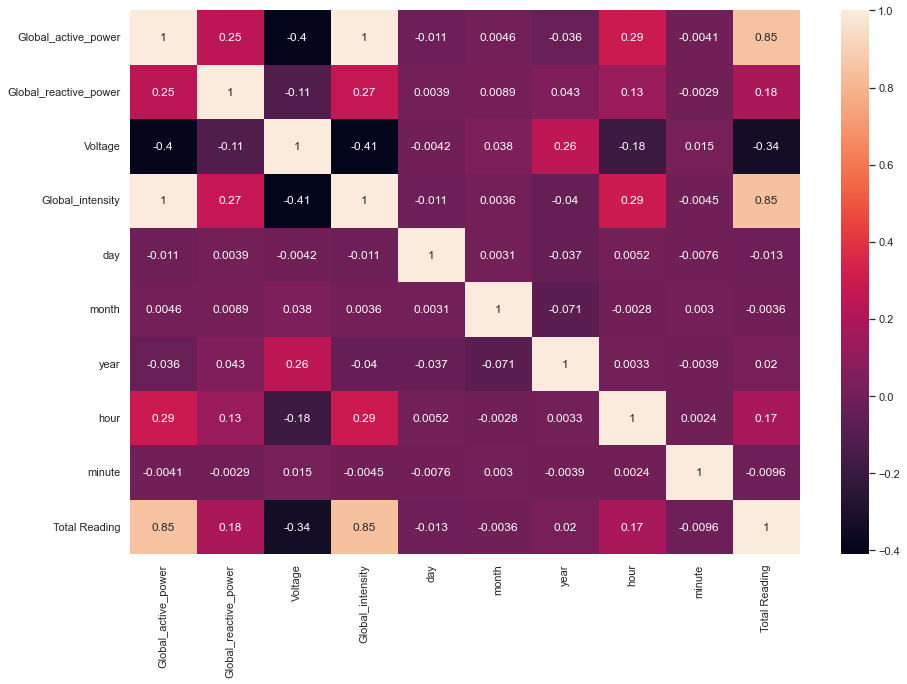

In [263]:
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(df.corr(),annot=True)

### Observations

We could observe that Total Reading is proportional to the Global_active_power and Global_intensity and nonproportional to voltage

We could observe that date time has no impact on total reading so we will remove those extra columns

In [314]:
### copy the data into another variable
df1=df.drop(['day','month','year','hour','minute'],axis=1)
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total Reading
0,0.496,0.054,243.72,2.6,0.0
1,0.312,0.080,244.56,1.2,0.0
2,0.584,0.198,239.97,2.6,1.0
3,0.826,0.000,245.04,3.4,1.0
4,0.318,0.076,237.04,1.4,0.0


In [265]:
columns = df1.columns[:-1]
columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity'],
      dtype='object')

### Relationship between Total Reading and other columns

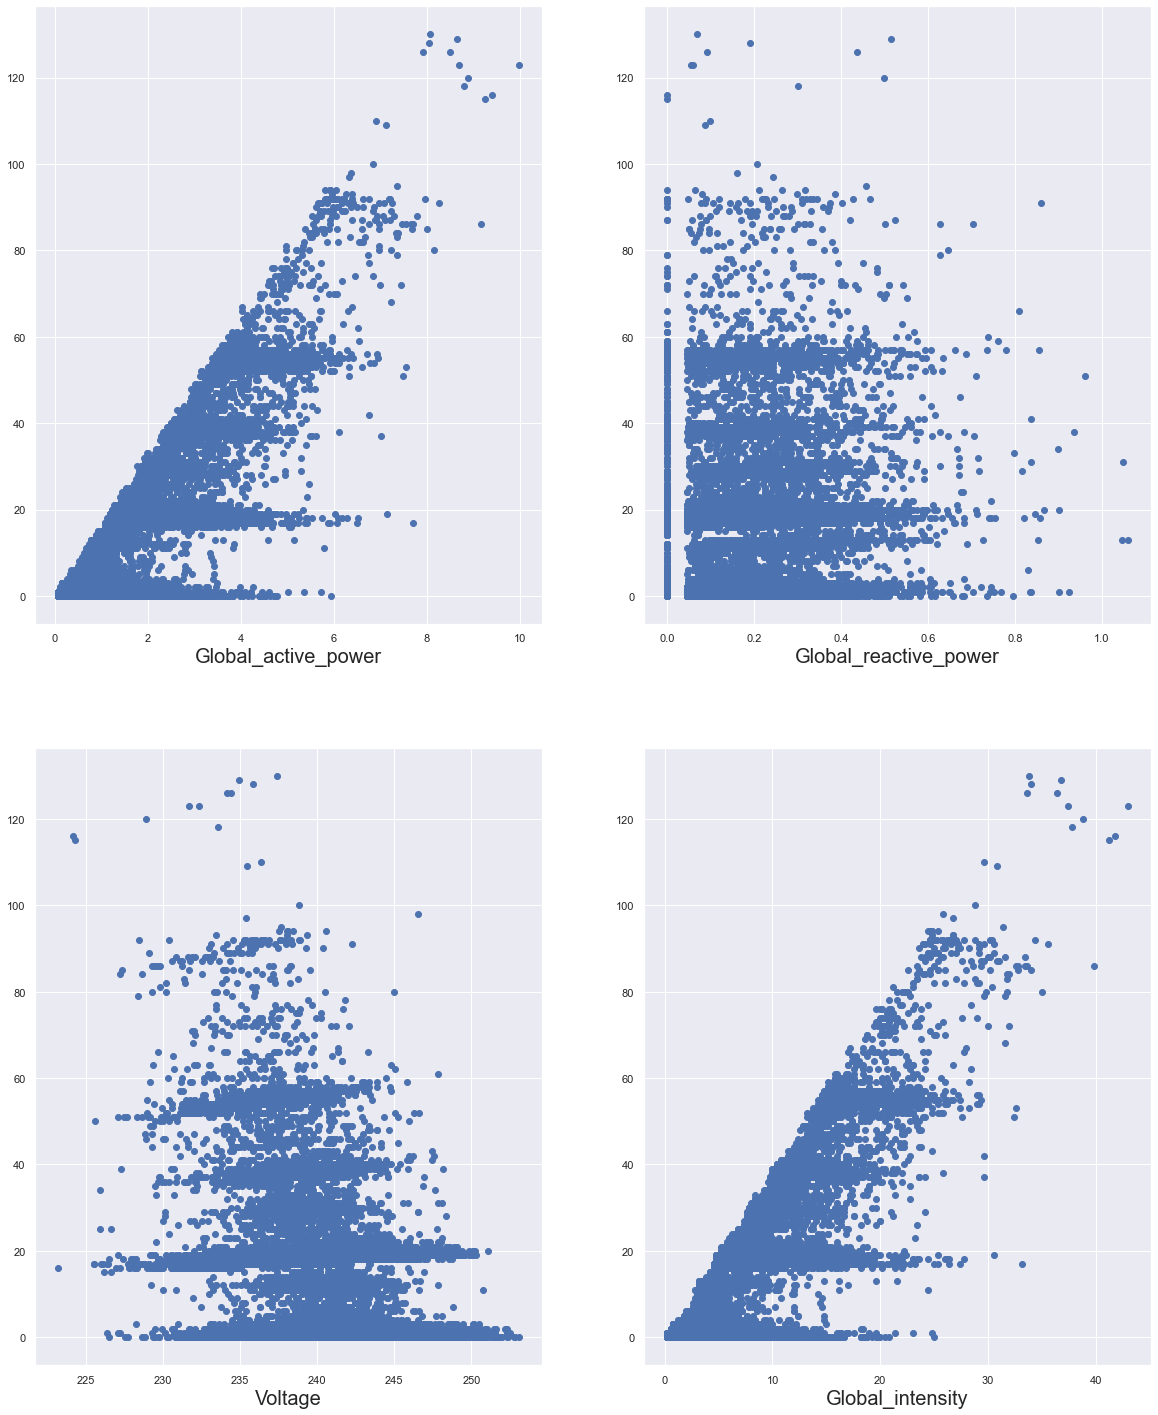

In [148]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=4 :     # as there are 11 columns in the data
        ax = plt.subplot(2,2,plotnumber)
        plt.scatter(x=df1[column],y=df1['Total Reading'])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Distribution of data

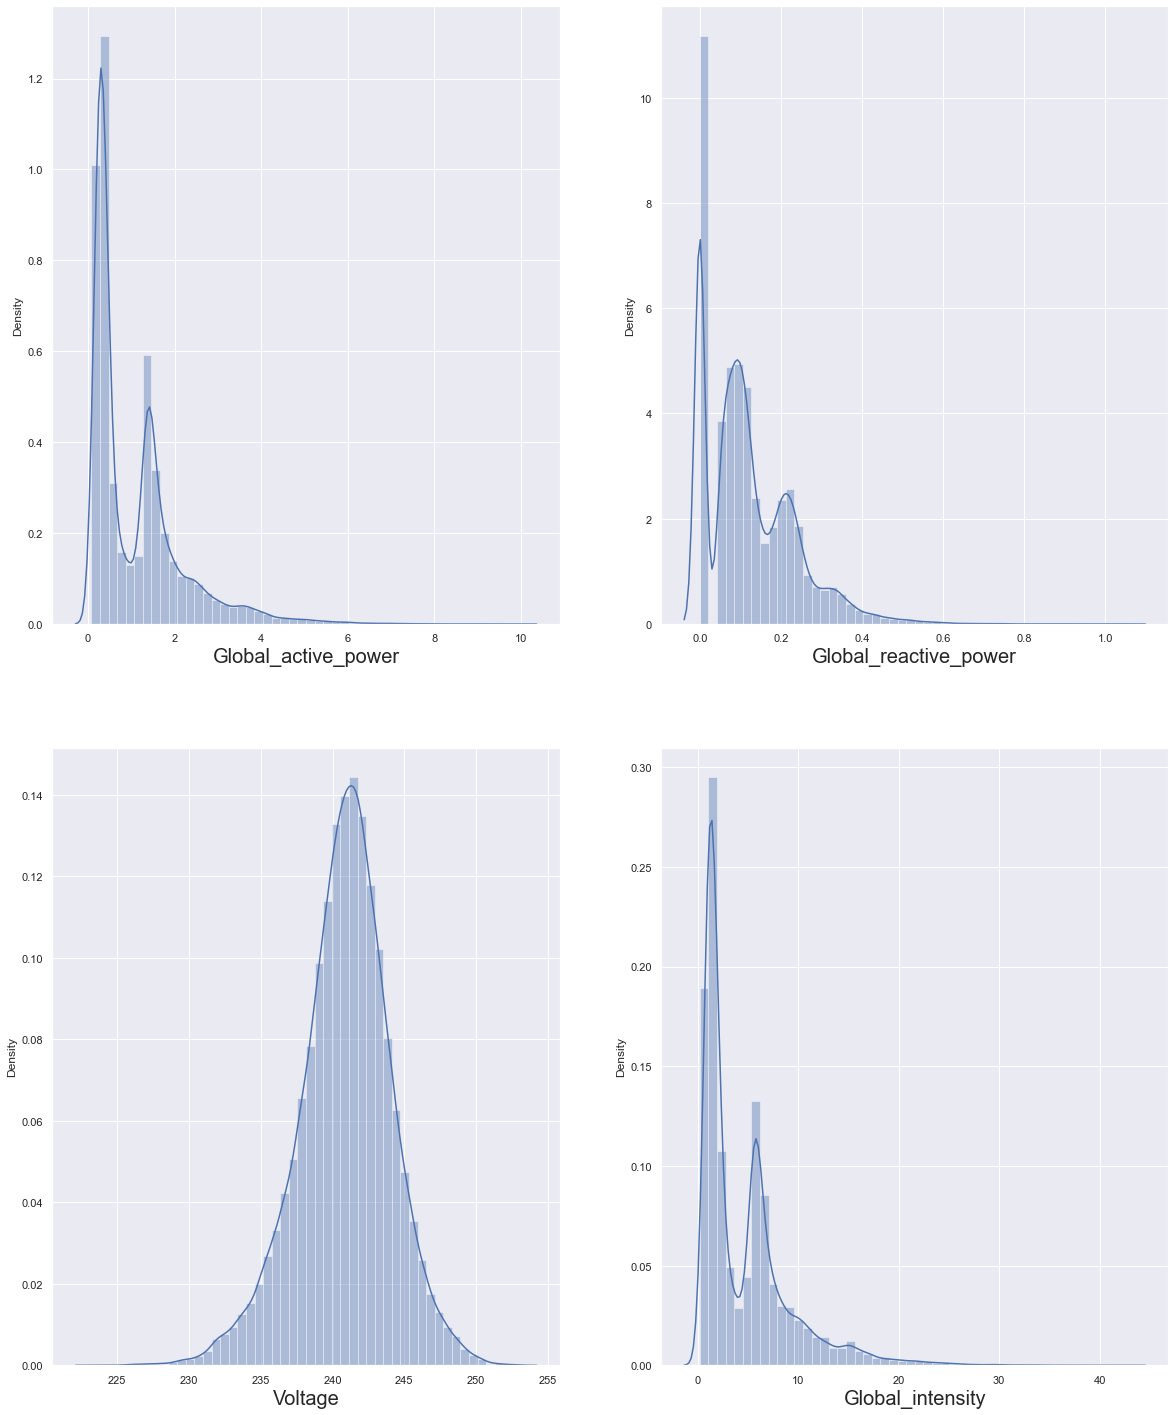

In [149]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=4 :     # as there are 4 columns in the data
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Outliers Checking

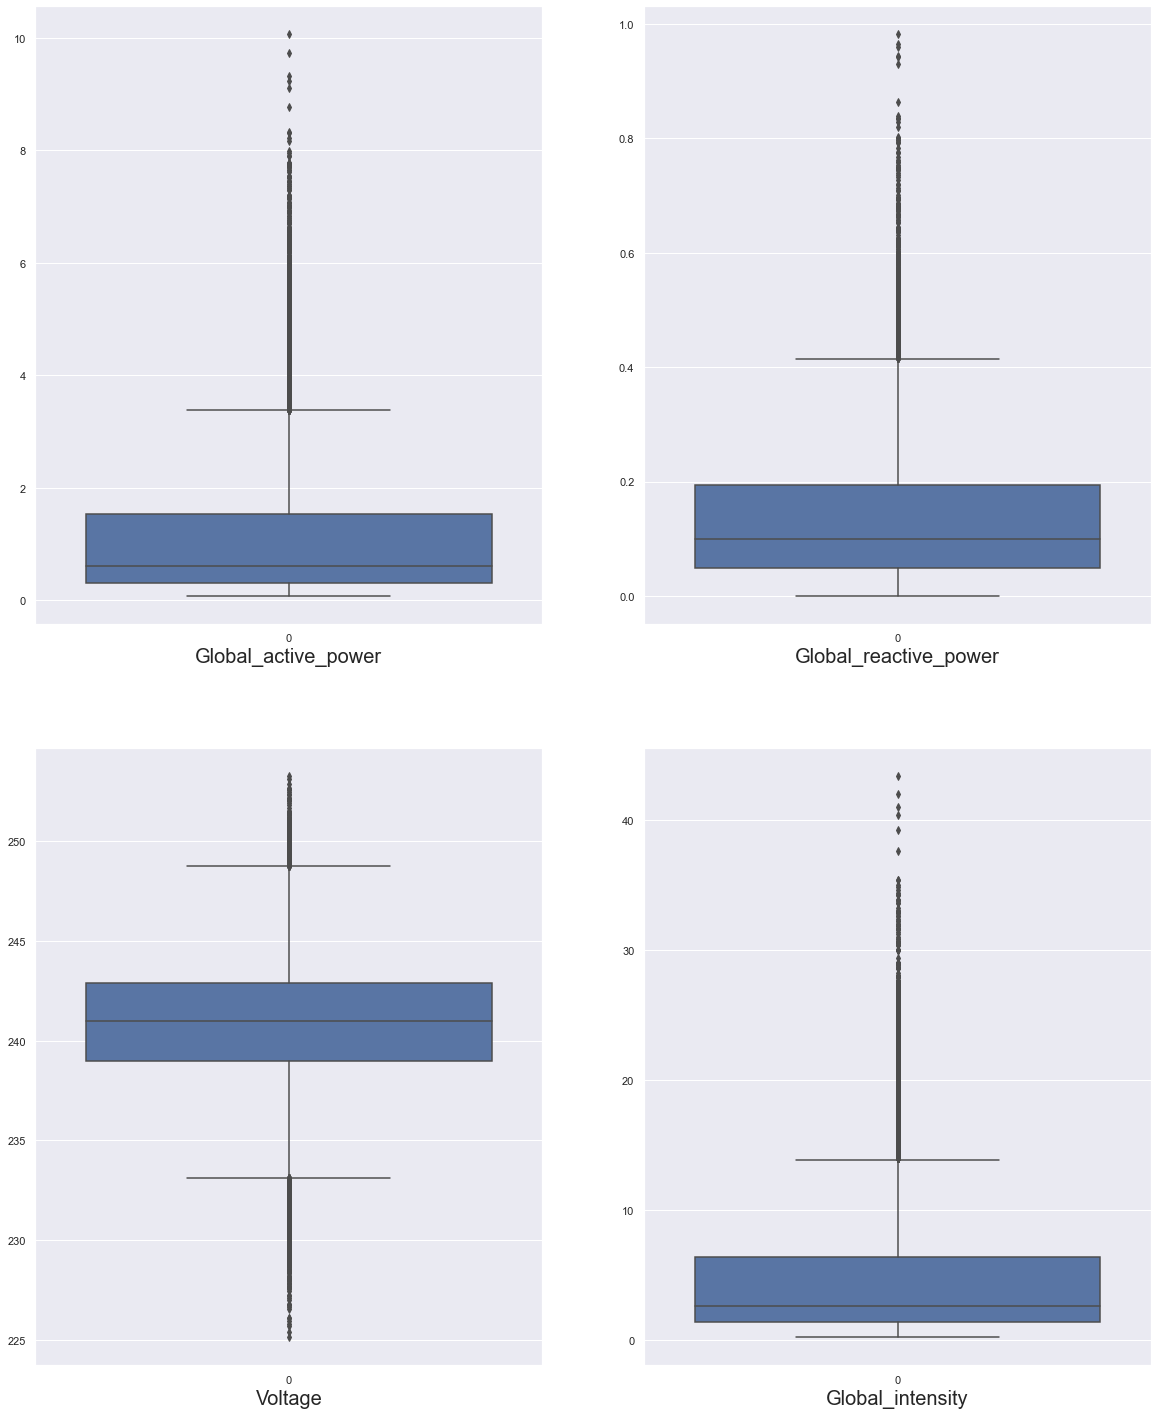

In [266]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=4 :     # as there are 4 columns in the data
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(data=df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### handling Oultiers

In [315]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.04)
    q2=df[variable].quantile(0.90)
    iqr=q2-q1
    up_limit=q2
    +(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [106]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        lower_limit,upper_limit=outlier_threshold(data,variable)
        data.loc[data[variable]<lower_limit,variable]=lower_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit  

In [316]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        lower_limit,upper_limit=outlier_threshold(data,variable)
        data.drop(index=data[data[variable]<lower_limit].index,inplace=True)
        data.drop(index=data[data[variable]>upper_limit].index,inplace=True)

In [269]:
columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity'],
      dtype='object')

In [270]:
df1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total Reading
0,0.496,0.054,243.72,2.6,0.0
1,0.312,0.080,244.56,1.2,0.0
2,0.584,0.198,239.97,2.6,1.0
3,0.826,0.000,245.04,3.4,1.0
4,0.318,0.076,237.04,1.4,0.0
...,...,...,...,...,...
49995,1.554,0.216,241.52,6.6,21.0
49996,0.960,0.000,241.32,4.0,1.0
49997,0.350,0.234,243.61,1.6,2.0
49998,0.996,0.118,241.40,4.2,12.0


In [317]:
replace_with_threshold(df1,columns)

In [295]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32582 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    32582 non-null  float64
 1   Global_reactive_power  32582 non-null  float64
 2   Voltage                32582 non-null  float64
 3   Global_intensity       32582 non-null  float64
 4   Total Reading          32582 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


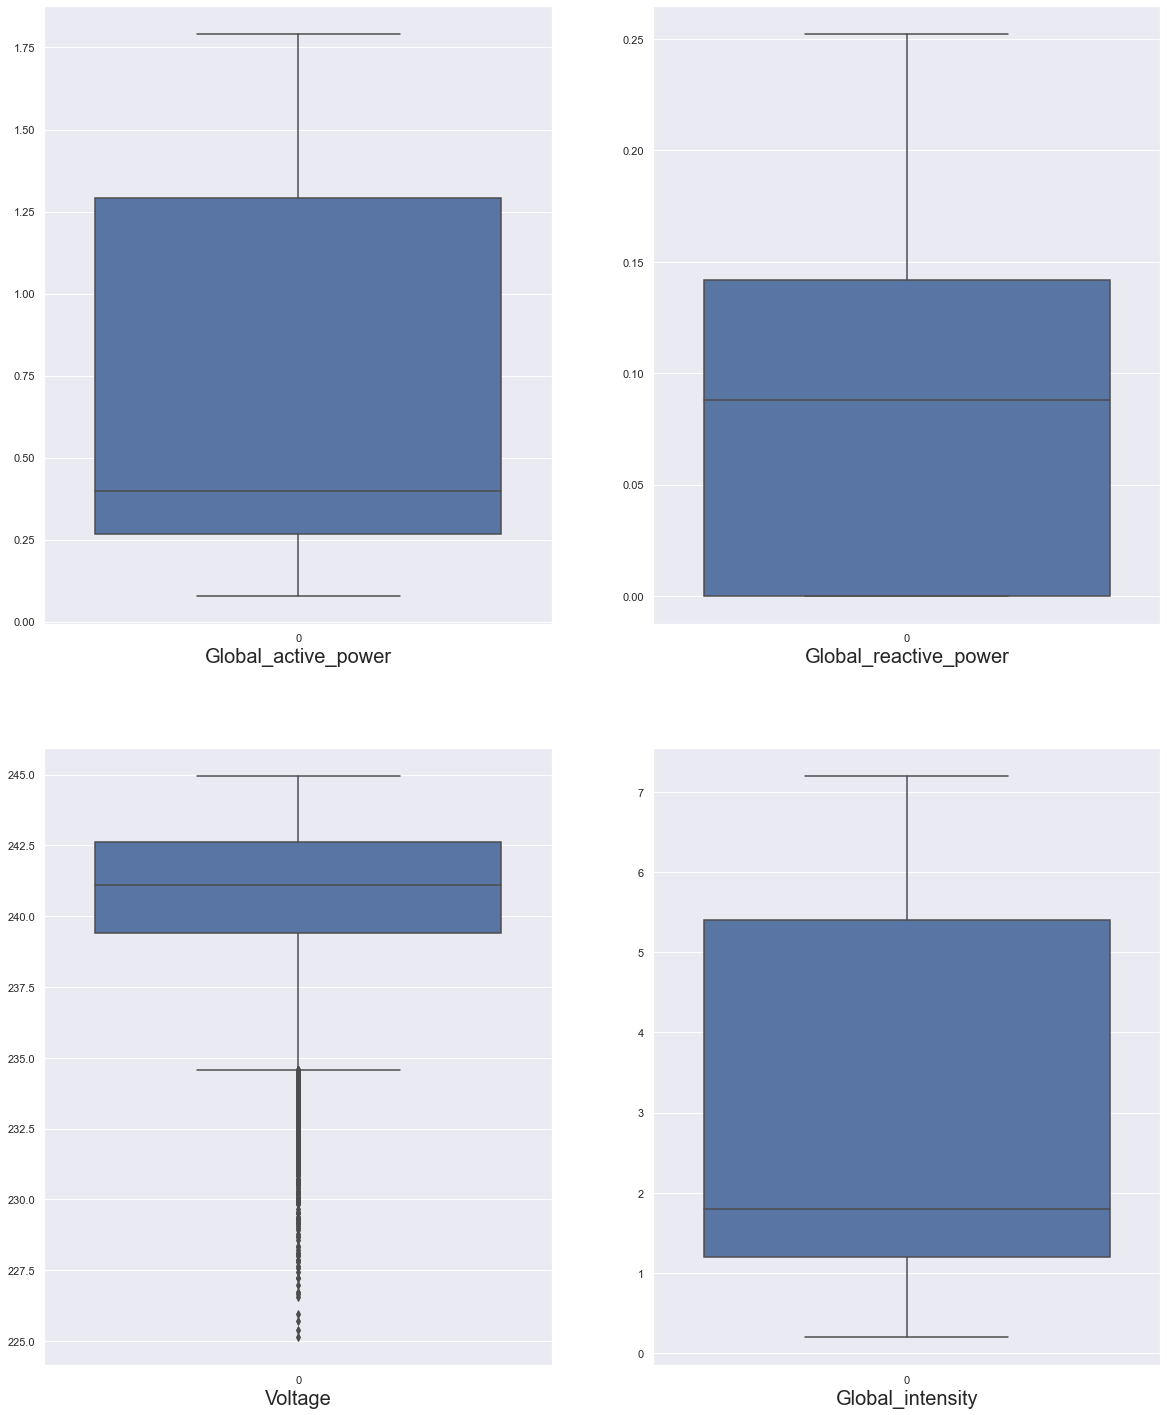

In [318]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=4 :     # as there are 4 columns in the data
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(data=df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Model with dataset without disturbing outliers 

In [319]:
X=df1.drop('Total Reading',axis=1)
y=df1['Total Reading']

In [320]:
X.shape,y.shape

((32582, 4), (32582,))

In [321]:
#split the train and test data
from sklearn.model_selection import train_test_split

In [322]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [323]:
X_train.sample(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
39072,1.288,0.048,241.31,5.2
8370,0.222,0.000,242.44,1.0


In [324]:
y_train.sample(2)

25801    0.0
16417    0.0
Name: Total Reading, dtype: float64

In [325]:
X_test.sample(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
12891,0.216,0.000,242.43,0.8
21327,0.404,0.116,242.76,1.8


In [326]:
y_test.sample(2)

35314     0.0
18753    18.0
Name: Total Reading, dtype: float64

In [327]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((24436, 4), (24436,), (8146, 4), (8146,))

In [328]:
# standadize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [329]:
scaler

StandardScaler()

In [330]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.73190387, -1.22950729,  1.57085886, -0.79325113],
       [ 0.50083906, -1.22950729, -1.93859039,  0.51571903],
       [-0.75104584,  0.32067091,  0.61130357, -0.69975326],
       ...,
       [-0.79315817,  0.89870346, -0.13416768, -0.69975326],
       [-0.66682117,  0.18929988,  0.45074053, -0.69975326],
       [-0.81995693, -1.22950729,  0.79098125, -0.79325113]])

In [331]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.54216229,  0.24184829, -0.13034475,  1.54419558],
       [ 1.16315126, -1.22950729, -0.39794981,  1.17020411],
       [-1.11091489, -1.22950729, -1.97299675, -1.1672426 ],
       ...,
       [-1.06880256, -1.22950729, -1.64804775, -1.07374474],
       [-0.95777913,  0.76733243,  0.17548961, -0.886749  ],
       [-0.70510511,  0.2943967 , -0.55851285, -0.69975326]])

### Model Training

In [332]:
model=SVR()

In [333]:
model

SVR()

In [334]:
#training the data
model.fit(X_train, y_train)

SVR()

In [335]:
model.score(X_train, y_train)

0.7600543240315489

In [336]:
## prediction for the test data
reg_pred=model.predict(X_test)

In [337]:
reg_pred

array([18.69098095, 17.59958203,  0.11533693, ...,  0.09893977,
        0.97627857,  0.82706688])

In [338]:
## performance matrix
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

14.053347748905491
1.5920435272753874
3.748779501238435


In [339]:
score = r2_score(y_test,reg_pred)
print(score)

0.7641086524858707


In [340]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7639927496004688

## GridsearchCV

In [125]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3,cv=2)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END ...................C=0.1, gamma=1;, score=-0.101 total time=  36.6s
[CV 2/2] END ...................C=0.1, gamma=1;, score=-0.104 total time=  36.0s
[CV 1/2] END ..................C=0.1, gamma=0.1;, score=0.797 total time=  35.9s
[CV 2/2] END ..................C=0.1, gamma=0.1;, score=0.785 total time=  36.5s
[CV 1/2] END .................C=0.1, gamma=0.01;, score=0.732 total time=  38.2s
[CV 2/2] END .................C=0.1, gamma=0.01;, score=0.719 total time=  38.4s
[CV 1/2] END ................C=0.1, gamma=0.001;, score=0.193 total time=  38.5s
[CV 2/2] END ................C=0.1, gamma=0.001;, score=0.194 total time=  38.0s
[CV 1/2] END ..............C=0.1, gamma=0.0001;, score=-0.247 total time=  33.7s
[CV 2/2] END ..............C=0.1, gamma=0.0001;, score=-0.252 total time=  33.3s
[CV 1/2] END ......................C=1, gamma=1;, score=0.662 total time=  39.7s
[CV 2/2] END ......................C=1, gamma=1;

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [128]:
grid.best_estimator_

SVR(C=100, gamma=0.1)

In [341]:
model1=SVR(C=100, gamma=0.1)

In [342]:
model1.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [343]:
model1.score(X_train,y_train)

0.7619896777140075

In [390]:
## prediction for the test data
reg_pred=model1.predict(X_test)

In [391]:
reg_pred

array([18.62141186, 17.39098882,  0.06316578, ...,  0.08858373,
        0.90012238,  0.83102716])

In [392]:
## performance matrix
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

13.946637682743862
1.596431752957229
3.7345197392360725


In [393]:
score = r2_score(y_test,reg_pred)
print(score)

0.7658998257884846


In [394]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7657848029784065

## Linear Regression

In [344]:
from sklearn.linear_model import LinearRegression

In [345]:
model2=LinearRegression()

In [346]:
model2

LinearRegression()

In [347]:
model2.fit(X_train, y_train)

LinearRegression()

In [348]:
model2.score(X_train,y_train)

0.7240162474815052

In [349]:
## prediction for the test data
reg_pred=model2.predict(X_test)

In [350]:
reg_pred

array([15.38436519, 13.22034524, -0.55118951, ..., -0.78823951,
       -1.61829233,  0.86850532])

In [351]:
y_test

30480    18.0
47587    18.0
17025     0.0
22722     1.0
19345    19.0
         ... 
20196     0.0
22077     0.0
35189     0.0
6259      1.0
31        0.0
Name: Total Reading, Length: 8146, dtype: float64

In [352]:
## performance matrix
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

16.31950829194539
2.6377401180605275
4.039741116946158


In [353]:
score = r2_score(y_test,reg_pred)
print(score)

0.7260701954767452


In [354]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7259356027709236

## Ridge regression

In [355]:
 from sklearn.linear_model import Ridge

In [356]:
model3=Ridge()

In [357]:
model3

Ridge()

In [358]:
model3.fit(X_train,y_train)

Ridge()

In [359]:
model3.score(X_train,y_train)

0.724012563428253

In [370]:
## prediction for the test data
reg_pred=model3.predict(X_test)

In [371]:
reg_pred

array([15.38453268, 13.23018177, -0.56582493, ..., -0.78866056,
       -1.60596186,  0.86498612])

In [372]:
## performance matrix
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

16.320789892993556
2.6373795915093474
4.039899737987758


In [373]:
score = r2_score(y_test,reg_pred)
print(score)

0.7260486832645926


In [374]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.725914079988958

## Lasso Regression

In [366]:
from sklearn.linear_model import Lasso

In [367]:
model4=Lasso()

In [368]:
model4.fit(X_train,y_train)

Lasso()

In [369]:
model4.score(X_train,y_train)

0.7007501970861071

In [375]:
## prediction for the test data
reg_pred=model4.predict(X_test)

In [376]:
reg_pred

array([13.95978606, 11.84624156, -0.83502547, ..., -0.60018719,
        0.0189319 ,  1.42796157])

In [377]:
## performance matrix
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

17.68015320634126
2.9370631632857407
4.2047774264925435


In [378]:
score = r2_score(y_test,reg_pred)
print(score)

0.7032311988134706


In [379]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7030853843920548

## Elastic Regression

In [380]:
from sklearn.linear_model import ElasticNet

In [381]:
model5=ElasticNet()

In [382]:
model5

ElasticNet()

In [383]:
model5.fit(X_train,y_train)

ElasticNet()

In [384]:
model5.score(X_train,y_train)

0.6642736293336949

In [385]:
## prediction for the test data
reg_pred=model5.predict(X_test)

In [386]:
reg_pred

array([12.83823073, 11.01343157, -0.15736899, ...,  0.16872291,
        0.88714347,  1.95567251])

In [387]:
## performance matrix
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

19.852147448353275
3.2925889664193737
4.455574872937641


In [388]:
score = r2_score(y_test,reg_pred)
print(score)

0.6667733627380026


In [389]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6666096351186626

### Final Conclusion

In [397]:
conclusion=pd.DataFrame({"model":["SVR",'LinearRegression','Ridge','Lasso','Elastic'],"R_square":[0.7658998257884846,0.7260701954767452,0.7260486832645926,0.7032311988134706,0.6667733627380026],"Adjusted R_square":[0.7657848029784065,0.7259356027709236,0.725914079988958,0.7030853843920548,0.6666096351186626]})

In [398]:
conclusion

,model,R_square,Adjusted R_square
0,SVR,0.765900,0.765785
1,LinearRegression,0.726070,0.725936
2,Ridge,0.726049,0.725914
3,Lasso,0.703231,0.703085
4,Elastic,0.666773,0.666610


From the above results we can conclude that for this dataset the best method we can use is SVR since it is giving the highest accuracy